In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con una codificación alternativa
file_path = 'FFHASES_202409_07.csv'
try:
    data = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    

pd.options.display.float_format = '{:,.2f}'.format

data['PREMIO'] = data['PREMIO'].apply(lambda x: str(x).replace(' ', '.')).astype(float)
data['COMDIR'] = data['COMDIR'].apply(lambda x: str(x).replace(' ', '.')).astype(float)
data['MES-ANIO'] = pd.to_datetime(data['ACREDITAR'], format='%d.%m.%Y', errors='coerce').dt.to_period('M')



Evolución por premios totales agrupados por MES-AÑO:
  MES-ANIO         PREMIO
0  2024-09 220,332,543.26


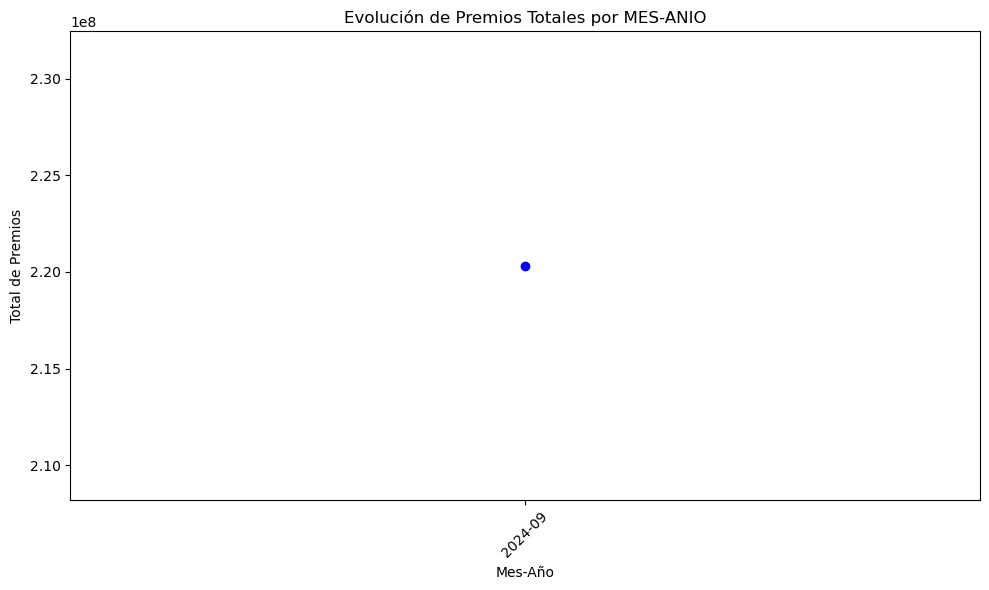

In [24]:
# 1. Evolución por premios totales agrupados por MES-AÑO de ACREDITAR
evolucion_premios = data.groupby('MES-ANIO')['PREMIO'].sum().reset_index().sort_values(by='PREMIO', ascending=False)
print("\nEvolución por premios totales agrupados por MES-AÑO:")
print(evolucion_premios)

# Gráfico de evolución de premios totales por MES-ANIO
plt.figure(figsize=(10, 6))
plt.plot(evolucion_premios['MES-ANIO'].astype(str), evolucion_premios['PREMIO'], marker='o', linestyle='-', color='b')
plt.title('Evolución de Premios Totales por MES-ANIO')
plt.xlabel('Mes-Año')
plt.ylabel('Total de Premios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Cantidad por ramo agrupados por SECCION:
                           SECCION  PREMIO
1                      AUTOMOTORES    3188
0            ACCIDENTES PERSONALES     454
4               COMBINADO FAMILIAR     178
10                  RIESGOS VARIOS      85
8                    MOTOVEHICULOS      50
7    INTEGRAL P/COMERCIO-INDUSTRIA      44
6   INTEG.P/CONSORCIO DE COPROPIE.      30
13                  VIDA COLECTIVO       8
9            RESPONSABILIDAD CIVIL       7
5                         INCENDIO       5
11                  SEGURO TECNICO       4
2                           CASCOS       2
3                          CAUCION       1
12                     TRANSPORTES       1


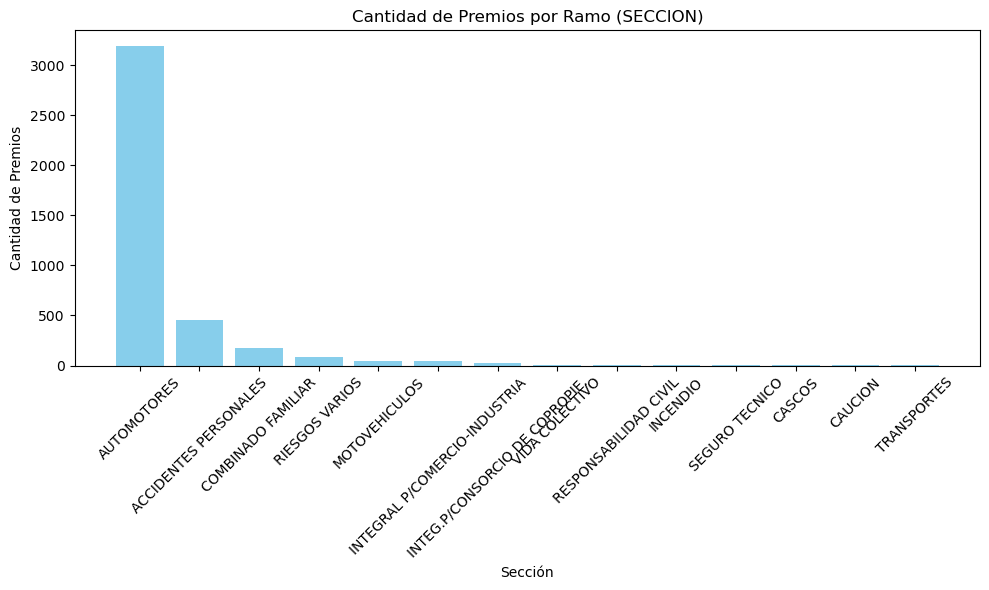

In [25]:
# 2. Cantidad por ramo agrupados por SECCION
cantidad_ramo = data.groupby('SECCION')['PREMIO'].count().reset_index().sort_values(by='PREMIO', ascending=False)
print("\nCantidad por ramo agrupados por SECCION:")
print(cantidad_ramo)

# Gráfico de cantidad de premios por SECCION
plt.figure(figsize=(10, 6))
plt.bar(cantidad_ramo['SECCION'], cantidad_ramo['PREMIO'], color='skyblue')
plt.title('Cantidad de Premios por Ramo (SECCION)')
plt.xlabel('Sección')
plt.ylabel('Cantidad de Premios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






Premio por forma de pago:
                   CANAL        PREMIO
4     DÉBITO DIRECTO CBU 67,069,434.83
12                  VISA 63,924,472.53
5             MASTERCARD 20,167,116.95
7          OTROS CANALES 14,677,090.46
2      CAJA (VENTANILLA) 10,156,902.95
11       TARJETA NARANJA  5,090,633.31
8              PAGOFACIL  4,184,579.37
10        PREMIO ANULADO  3,260,500.88
0   AMERICAN EXPRESS ARG  3,235,658.73
9         PAGOMISCUENTAS  1,430,206.11
3    CENCOSUD MASTERCARD    617,450.38
1                  CABAL    230,360.42
6           NOTA CREDITO          0.00


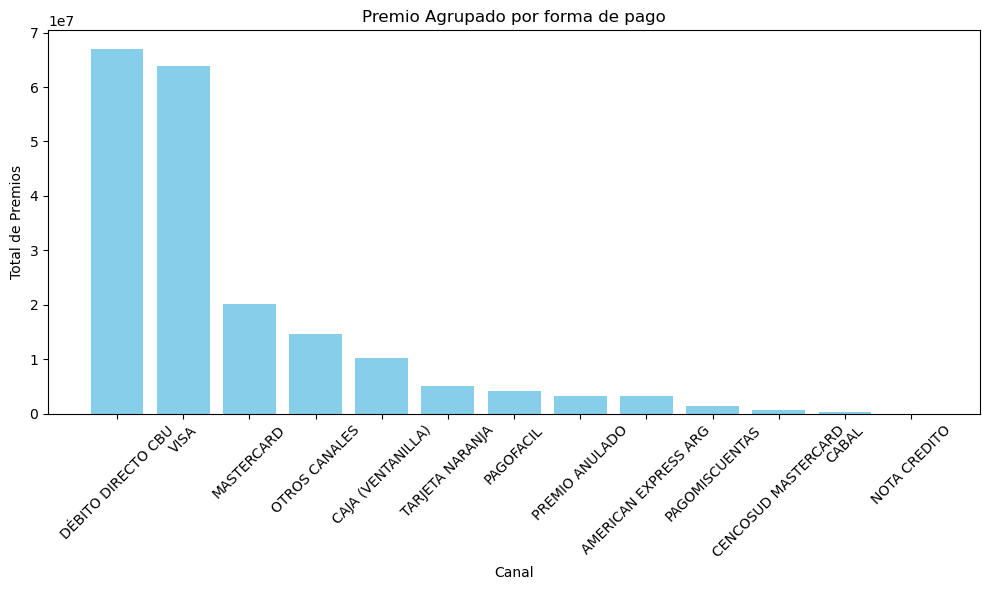

In [26]:
# 3. Cantidad por forma de pago agrupados por CANAL
cantidad_pago = data.groupby('CANAL')['PREMIO'].sum().reset_index().sort_values(by='PREMIO', ascending=False)
print("\nPremio por forma de pago:")
print(cantidad_pago)

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
plt.bar(cantidad_pago['CANAL'], cantidad_pago['PREMIO'], color='skyblue')  # Crear el gráfico de barras
plt.title('Premio Agrupado por forma de pago')
plt.xlabel('Canal')
plt.ylabel('Total de Premios')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.show()  # Mostrar el gráfico





Top 20 asegurados que tienen más pólizas:
                                              ASEGURADO  POLIZA
1135               PANTANETTI MARIANO GABRIEL (8791890)      30
749                 GUERRERO GONZALO EZEQUIEL (8824568)      26
1223                 RAGNI LILIANA SEBASTIANA (9070942)      26
396   COOPERATIVA DE PROVISION DE SERVICIOS PA (8601...      24
164                    BASABEZ OSVALDO JAVIER (8724445)      16
465                    DEMONTE RICARDO MARTIN (8611452)      14
1288                   ROJAS EDUARDO EZEQUIEL (9206834)      12
731                         GOYBURU JOSE LUIS (8308365)      12
1196                  PORTILLO ARIEL NAZARETH (9137692)      12
705                      GOMEZ LEONARDO DARIO (9058856)      12
441                    DE ARRIBA JAIME CARLOS (8647457)      10
249                    CABALLERO DIEGO GASTON (9186788)      10
1147                      PAZ ANGELA MACARENA (9074740)      10
802                    ISLAS FERNANDO ROBERTO (8634778)      

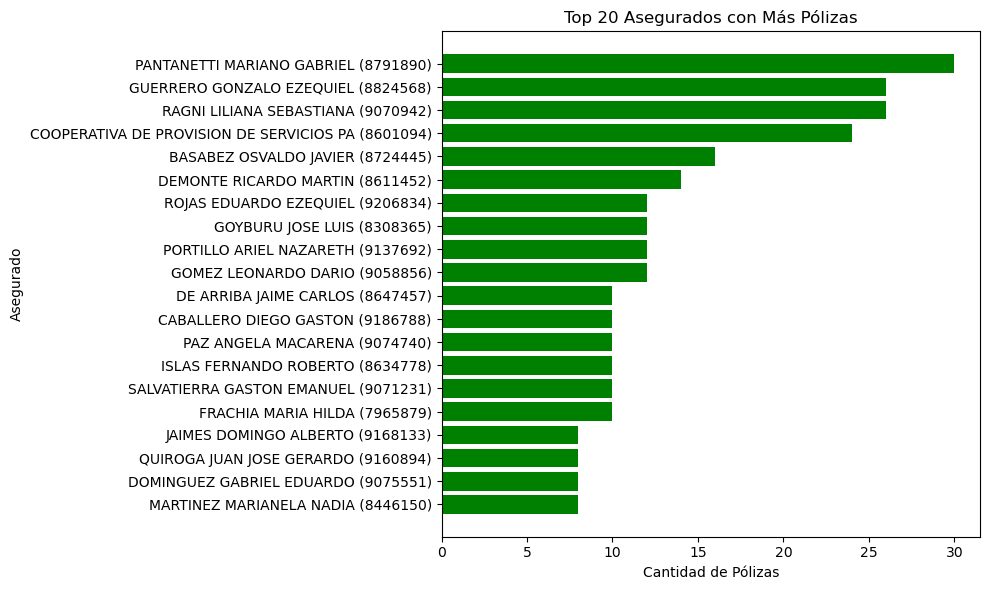

In [27]:
# 4. Top 20 asegurados que tienen más pólizas
top_asegurados_politicas = data.groupby('ASEGURADO')['POLIZA'].count().reset_index().sort_values(by='POLIZA', ascending=False).head(20)
print("\nTop 20 asegurados que tienen más pólizas:")
print(top_asegurados_politicas)

# Gráfico de Top 20 asegurados que tienen más pólizas
plt.figure(figsize=(10, 6))
plt.barh(top_asegurados_politicas['ASEGURADO'], top_asegurados_politicas['POLIZA'], color='green')
plt.title('Top 20 Asegurados con Más Pólizas')
plt.xlabel('Cantidad de Pólizas')
plt.ylabel('Asegurado')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el asegurado con más pólizas esté arriba
plt.tight_layout()
plt.show()




Top 20 asegurados que pagan el premio más alto:
                                              ASEGURADO       PREMIO
396   COOPERATIVA DE PROVISION DE SERVICIOS PA (8601... 6,956,335.10
520                        ENEI REMO FERNANDO (8985271) 1,710,624.00
16                              AGROFRESH SRL (7890680) 1,514,668.72
517                              ELECTRICA SA (7755048) 1,258,804.74
1093                     OLIVOS DEL NORTE SRL (8366809) 1,255,547.20
714                                  GONBE SA (8170232) 1,227,288.00
380                    COMERCIALIZADORA RL SA (9266983) 1,135,435.68
159                     BARTH CRISTIAN FABIAN (8882435) 1,092,337.90
248                            C&G RUEDAS SRL (8658268) 1,022,303.76
1282                RODRIGUEZ PATRICIA LILIAN (8640630)   935,668.34
769               HENRY COLOMER ARGENTINA SRL (8524241)   889,704.00
1552                    ZAMBRANA TORREZ DILAN (8480334)   806,500.00
1363                  SCARLATO MARCELO ADRIAN (9243797

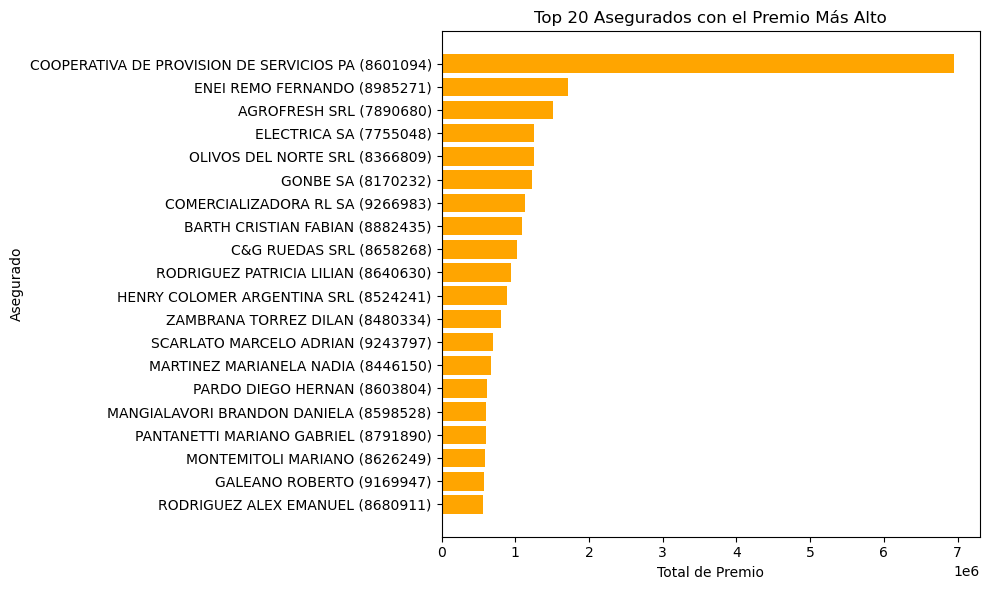

In [28]:
# 5. Top 20 asegurados que pagan el premio más alto
top_asegurados_premio = data.groupby('ASEGURADO')['PREMIO'].sum().reset_index().sort_values(by='PREMIO', ascending=False).head(20)
print("\nTop 20 asegurados que pagan el premio más alto:")
print(top_asegurados_premio)

# Gráfico de Top 20 asegurados que pagan el premio más alto
plt.figure(figsize=(10, 6))
plt.barh(top_asegurados_premio['ASEGURADO'], top_asegurados_premio['PREMIO'], color='orange')
plt.title('Top 20 Asegurados con el Premio Más Alto')
plt.xlabel('Total de Premio')
plt.ylabel('Asegurado')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el asegurado con el premio más alto esté arriba
plt.tight_layout()
plt.show()




Top 20 asegurados que generan más comisión:
                                              ASEGURADO     COMDIR
396   COOPERATIVA DE PROVISION DE SERVICIOS PA (8601... 433,827.45
16                              AGROFRESH SRL (7890680) 180,474.54
769               HENRY COLOMER ARGENTINA SRL (8524241) 112,361.18
1093                     OLIVOS DEL NORTE SRL (8366809)  72,504.17
1326                        SAGRERA ALDO RENE (8509663)  71,927.60
517                              ELECTRICA SA (7755048)  65,985.91
159                     BARTH CRISTIAN FABIAN (8882435)  64,093.80
248                            C&G RUEDAS SRL (8658268)  56,788.97
714                                  GONBE SA (8170232)  50,831.52
1430                         SYM SMITH MARTIN (9152505)  43,705.35
520                        ENEI REMO FERNANDO (8985271)  43,126.43
1324                             SAEZ AGUSTIN (9136522)  42,228.16
1363                  SCARLATO MARCELO ADRIAN (9243797)  40,563.15
843         LAB N

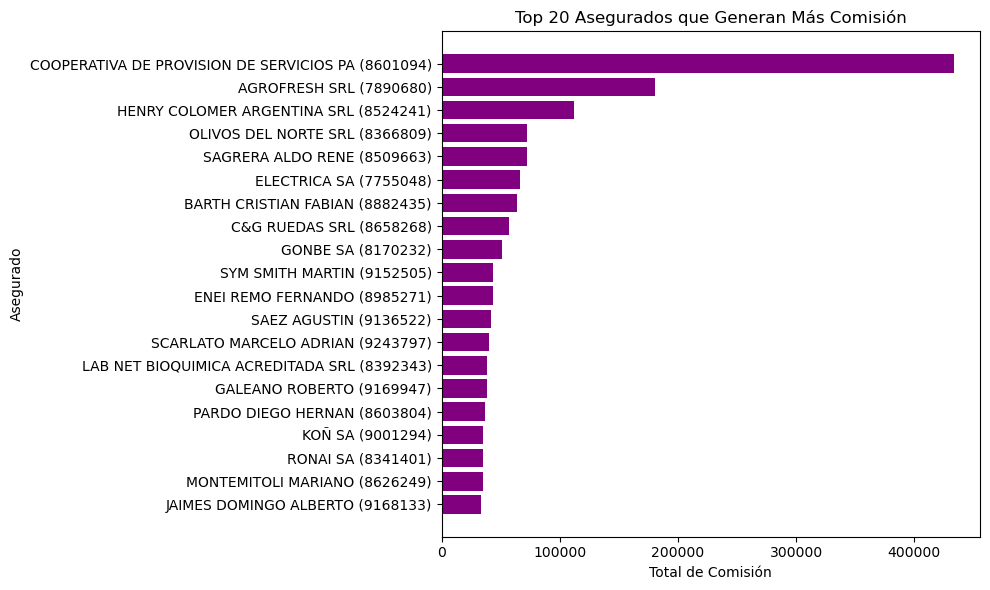

In [29]:
# 6. Top 20 asegurados que generan más comisión
top_asegurados_comision = data.groupby('ASEGURADO')['COMDIR'].sum().reset_index().sort_values(by='COMDIR', ascending=False).head(20)
print("\nTop 20 asegurados que generan más comisión:")
print(top_asegurados_comision)

# Gráfico de Top 20 asegurados que generan más comisión
plt.figure(figsize=(10, 6))
plt.barh(top_asegurados_comision['ASEGURADO'], top_asegurados_comision['COMDIR'], color='purple')
plt.title('Top 20 Asegurados que Generan Más Comisión')
plt.xlabel('Total de Comisión')
plt.ylabel('Asegurado')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el asegurado con más comisión esté arriba
plt.tight_layout()
plt.show()